# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# NumPy Basics 3

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 
from numpy.random import randn
import numpy as np

from os.path import exists
from os import remove

In [2]:
def delete_file(filename):
    if exists(filename): 
        remove(filename) 
        ret_msg = filename + ' is deleted !'
    else: 
        ret_msg = filename + ' is not exist.'
    
    return ret_msg

## 4. File input and output with arrays

### <font color='brown'> Storing arrays on disk in binary format </font>
> 배열을 바이너리 형식으로 디스크에 저장
- 배열은 기본적으로 압축되지 않은  raw 바이너리 형식의 .npy 파일로 저장된다.
- 저장하는 파일 경로가  .npy로 끝나지 않으면 자동적으로 확장자를 추가한다.
- np.savez 함수를 이용하면 여러개의 배열을 압축된 형식으로 저장할 수 있다. 

In [3]:
delete_file('some_array.npy')

'some_array.npy is deleted !'

In [4]:
delete_file('array_archive.npz')

'array_archive.npz is deleted !'

In [5]:
# %more array_archive.npz
# ! type array_archive.npz

# % rm some_array.npy
# % rm array_archive.npz

In [6]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.save('some_array', arr)

In [8]:
% ls *.np*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3CBD-1374

 C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages 디렉터리

2018-11-02  오전 01:06               168 some_array.npy
               1개 파일                 168 바이트
               0개 디렉터리  27,090,903,040 바이트 남음


In [9]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.savez('array_archive.npz', a=arr, b=arr)

In [11]:
% ls *.np*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3CBD-1374

 C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages 디렉터리

2018-11-02  오전 01:06               530 array_archive.npz
2018-11-02  오전 01:06               168 some_array.npy
               2개 파일                 698 바이트
               0개 디렉터리  27,090,903,040 바이트 남음


In [12]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

``` python
Signature: np.load(file, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
Docstring:
Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.

Notes
---------------------------------------------------------------------------------------------
- If the file contains pickle data, then whatever object is stored in the pickle is returned.
- If the file is a ``.npy`` file, then a single array is returned.
- If the file is a ``.npz`` file, then a dictionary-like object is returned
```

### <font color='brown'> Saving and loading text files </font>
> 텍스트 파일 불러오기와 저장하기

In [13]:
delete_file('data/D21_array_ex.csv')

'data/D21_array_ex.csv is not exist.'

In [14]:
data = '''\
0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334\
'''
with open('data/D21_array_ex.csv', 'w') as fp:
    fp.write(data)

In [15]:
with open('data/D21_array_ex.csv', 'r') as fp:    
    data = fp.read()

print(data)

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


In [16]:
%more data/D21_array_ex.csv

In [17]:
arr = np.loadtxt('data/D21_array_ex.csv', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

## 5. Linear algebra
> 선형대수
- 행렬의 곱셈, 분할, 행렬식, 정사각 행렬 수학 같은 선형대수는 배열을 다루는 라이브러리에서 중요한 부분
- MATLAB 같은 다른 언어와 달리 2개의 2차원 배열을 * 연산자로 곱하는 건행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산
- 행렬곱셈은 배열메소드이자 numpy 네임스페이스 안에 있는 함수인 dot 함수를 사용해서 계산

In [18]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [20]:
x.dot(y)  # equivalently np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [21]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [22]:
np.random.seed(12345)

> 
- 과학계산 파이썬 커뮤니티는 언젠가 np.dot을 사용하는 대신 문법적으로 후러씬 보기 좋은 행렬 곱셉 이상 연산자가 구현되기를 기대하고 있다.
- 하지만 현재까지는 np.dot을 사용할 수 밖에 없다.

In [23]:
from numpy.linalg import inv, qr
# X = randn(5, 5)
# mat = X.T.dot(X)
# inv(mat)
# mat.dot(inv(mat))
# q, r = qr(mat)
# r

In [24]:
X = randn(5, 5)
X

array([[-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057],
       [ 1.39340583,  0.09290788,  0.28174615,  0.76902257,  1.24643474],
       [ 1.00718936, -1.29622111,  0.27499163,  0.22891288,  1.35291684],
       [ 0.88642934, -2.00163731, -0.37184254,  1.66902531, -0.43856974],
       [-0.53974145,  0.47698501,  3.24894392, -1.02122752, -0.5770873 ]])

In [25]:
mat = X.T.dot(X)
mat

array([[ 4.07499325, -3.30588372, -1.30731336,  3.44655322,  2.61973938],
       [-3.30588372,  6.15227438,  1.71493621, -4.31933033, -0.09378269],
       [-1.30731336,  1.71493621, 11.11872134, -3.37023945, -2.00972893],
       [ 3.44655322, -4.31933033, -3.37023945,  4.78118413,  0.03314614],
       [ 2.61973938, -0.09378269, -2.00972893,  0.03314614,  7.77364994]])

In [26]:
inv(mat)

array([[ 3.03609983, -0.1808297 , -0.68779105, -2.82852163, -1.19110946],
       [-0.1808297 ,  0.50346566,  0.12149398,  0.6701624 ,  0.0955664 ],
       [-0.68779105,  0.12149398,  0.29039878,  0.80814474,  0.30488423],
       [-2.82852163,  0.6701624 ,  0.80814474,  3.4151871 ,  1.15567215],
       [-1.19110946,  0.0955664 ,  0.30488423,  1.15567215,  0.60509381]])

In [27]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00,
         4.44089210e-16,  1.11022302e-15],
       [-1.56819002e-15,  1.00000000e+00,  3.29597460e-16,
        -1.66533454e-16,  8.88178420e-16],
       [ 8.88178420e-16, -1.11022302e-16,  1.00000000e+00,
        -8.88178420e-16,  2.22044605e-16],
       [-6.17561557e-16,  1.89518540e-16, -1.83880688e-16,
         1.00000000e+00,  1.26287869e-15],
       [ 0.00000000e+00, -1.11022302e-16, -4.44089210e-16,
         0.00000000e+00,  1.00000000e+00]])

In [28]:
q, r = qr(mat)

In [29]:
r

array([[ -6.92714002,   7.38899524,   6.12272905,  -7.11625341,
         -4.92150833],
       [  0.        ,  -3.97347612,  -0.86707993,   2.97472904,
         -5.74024113],
       [  0.        ,   0.        , -10.26810228,   1.89090298,
          1.60790112],
       [  0.        ,   0.        ,   0.        ,  -1.29964934,
          3.35772244],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.55705805]])

<font color='blue'> 
[Note] 
<br> 과학계산 파이썬 커뮤니티는 언젠가 np.dot을 사용하는 대신 문법적으로 훨씬 보기 좋은 행렬 곱셈 이항 연산자가 구현되기를 기대하고 있다.
<br> 하지만 현재까지는 np.dot을 사용할 수 밖에 없다.
</font>

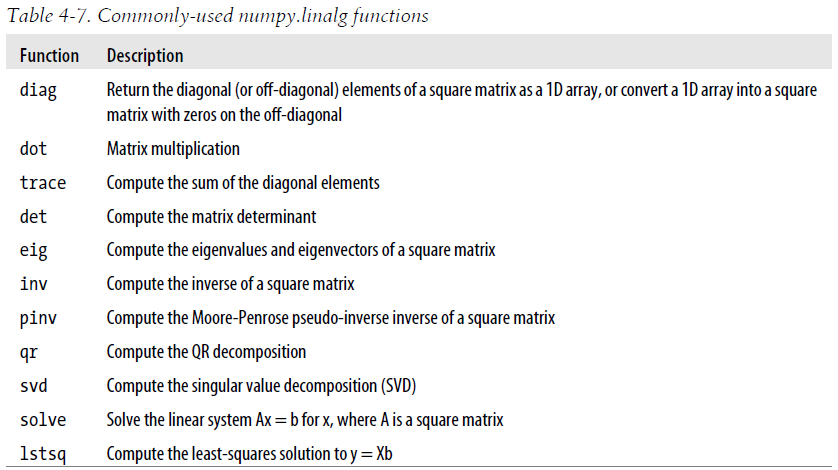

In [30]:
# 자주 사용하는 numpy.linalg 함수
Image(bpc.Table4_7)

## 6. Random number generation
> 난수 생성
- numpy.random 모듈은 파있너 내장 random 함수를 보강하여 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는 주로 사용
- Eg. normal을 사용하여 표준정규분포로부터 4x4 크기의 표본을 생성할 수 있다.

In [31]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.24121276e-01,  3.02613562e-01,  5.23772068e-01,
         9.40277775e-04],
       [ 1.34380979e+00, -7.13543985e-01, -8.31153539e-01,
        -2.37023165e+00],
       [-1.86076079e+00, -8.60757398e-01,  5.60145293e-01,
        -1.26593449e+00],
       [ 1.19827125e-01, -1.06351245e+00,  3.32882716e-01,
        -2.35941881e+00]])

> 성능 비교
- numpy.random은 매우 큰 표본을 생성하는데 파이썬 내장 모듈보다 수십배 이상 빠름
- 파이썬 내장 random 모듈은 한번에 하나의 값만 생성할 수 있다.

In [32]:
from random import normalvariate
N = 1000000

In [33]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.17 s ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit np.random.normal(size=N)

40.9 ms ± 742 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


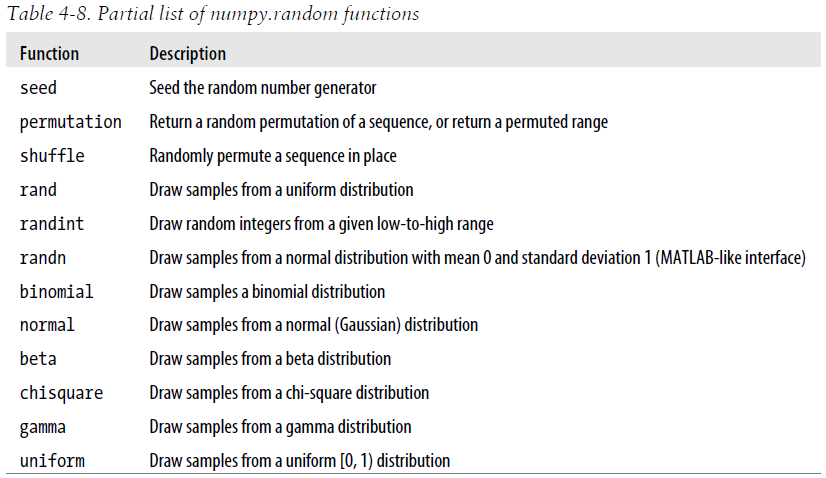

In [35]:
# 일부 numpy.random 함수
Image(bpc.Table4_8)

## Example : Random Walks
> 계단 오르내리기 예제
- 배열연산의 활용을 보여줄 수 있는 간단한 애플리케이션
- 계단의 중간에서 같은 확률로 한계단 올라가거나 내려간다고 가정하자.

In [36]:
np.random.seed(12345)

In [37]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [38]:
walk.min()

-3

In [39]:
walk.max()

31

> 
- 처음 위치에서 10칸 이상 떨어진 시점을 알려주는 불리언 배열
- 최초의 10 혹은 -10인 시점을 구해야 하므로 불리언 배열에서 최대값의 처음 색인을 반환하는 argmax 사용
- argmax는 배열 전체를 모두 확인하기 때문에 효고적인 방법은 아니다. 

In [40]:
(np.abs(walk) >= 10).argmax()

37

### <font color='brown'> Simulating many random walks at once </font>
> 한번에 계단 오르내리기 시뮬레이션

In [41]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [42]:
walks.max()

138

In [43]:
walks.min()

-133

In [44]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [45]:
hits30.sum() # Number that hit 30 or -30

3410

In [46]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

> 
<br> 다른 분포를 사용해서도 시도
<br> normal 함수에 표준편차와 평균값을 넣어 정규분포에서 표본을 추출하는 것처럼 그냥 다른 난수 발생 함수를 사용

In [47]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

In [48]:
steps

array([[-0.02565707,  0.36310961,  0.41720151, ...,  0.15726638,
        -0.16256773,  0.05423703],
       [-0.10456259,  0.07877516,  0.19110411, ...,  0.07678875,
        -0.18545695,  0.0333151 ],
       [-0.16728617,  0.12034941, -0.30427248, ..., -0.30982359,
        -0.17291787,  0.02772071],
       ...,
       [ 0.27987403,  0.05477886, -0.02167382, ...,  0.02795479,
         0.25268149,  0.06510672],
       [ 0.31853634, -0.15109745, -0.1121375 , ...,  0.14705719,
         0.18206871, -0.02473096],
       [-0.13101904, -0.24008233, -0.03925202, ..., -0.18320903,
        -0.20967376,  0.20705573]])

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>